In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.metrics import r2_score as score
from sklearn import preprocessing

In [25]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]

Regularization parameter: Lasso
The  λ  for lasso can var between 0 (no penalty, acts like OLS) and infinity. If  λ is too large, all parameters will be set to zero.

Create a plot below of how  R2  varies across different values of  λ  for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.

Do lasso and ridge yield the same  R2  for a given lambda value?

In [83]:
# Take a range of alphas from very small to large value
alpha_range = list(np.arange(.01, 1, .1))

# Collect r squared values for ridge and lasso 
rsq_ridg = []
rsq_lasso = []

# Run the model for a range of alpha values 
for alpha in alpha_range:
    ridgeregrBig = linear_model.Ridge(alpha=alpha, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    rsq_ridg.append(ridgeregrBig.score(X_train2, Y_train))
    
    lassBig = linear_model.Lasso(alpha=alpha)
    lassBig.fit(X_train2, Y_train)
    rsq_lasso.append(lassBig.score(X_train2, Y_train))

C:\Users\Omistaja\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.8225496119437083e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Omistaja\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.011669498794713e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Omistaja\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.852580290726374e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\Omistaja\Anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Resu

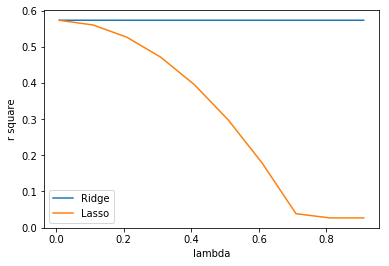

In [85]:
# Visualize r squared for different lamda values 
plt.plot(alpha_range, rsq_ridg, label = 'Ridge')
plt.plot(alpha_range, rsq_lasso, label = 'Lasso')
plt.xlabel('lambda')
plt.ylabel('r square')
plt.legend()
plt.show()

In [ ]:
Ridge and Lasso give different lamda values 